In [6]:
%pylab nbagg
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys

# Set working directory (adjust if needed)
#os.chdir("/Users/giovanni/Documents/GitHub/fufo/notebook/Psychedelic_proj/2025_LisaLuan/notebooks")

sys.path.append(os.path.abspath("../src"))
from functions_figs import *

file_path = '../data/hd-EEG/5MOIs_results_df.csv'

Populating the interactive namespace from numpy and matplotlib


In [7]:
#path_out='/Users/giovanni/Documents/GitHub/fufo/data/Interim/Momi/Article/Figures/py/hdEEG/'

In [8]:
# Load dataset
df = pd.read_csv(file_path)


# Define a mapping from M_i to actual metric names
metric_names = {
    "M_13": "Salience",
    "M_14": "Peak Synchrony",
    "M_76": "Entrainment",
    "M_29": "Fluidity",
    "M_119": "Complexity"
}

# Apply the mapping to replace metric codes with names
df["Pre_Metric"] = df["Pre_Metric"].map(metric_names)
df["Post_Metric"] = df["Post_Metric"].map(metric_names)

ordered_metrics = ["Salience", "Peak Synchrony", "Entrainment", "Fluidity", "Complexity"]

# Ensure Pre_Metric and Post_Metric columns follow the desired order in the DataFrame
df["Pre_Metric"] = pd.Categorical(df["Pre_Metric"], categories=ordered_metrics, ordered=True)
df["Post_Metric"] = pd.Categorical(df["Post_Metric"], categories=ordered_metrics, ordered=True)


In [9]:
df

,Patient,Session,Radius,Pre_Metric,Post_Metric,Correlation,Significance,p-values,Network,ROI Name,ROI Label,Clustering Coefficient,Degree,Betweenness Centrality
0,P1,S1,5,Salience,Salience,0.314286,1,0.049505,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
1,P1,S1,5,Salience,Peak Synchrony,0.365251,1,0.019802,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
2,P1,S1,5,Salience,Fluidity,0.299099,1,0.039604,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
3,P1,S1,5,Salience,Entrainment,0.281853,0,0.089109,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
4,P1,S1,5,Salience,Complexity,-0.286744,0,0.910891,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81395,P34,S12,100,Complexity,Salience,-0.253913,0,0.762376,SalVentAttn,7Networks_LH_Default_Temp_4,77,0.001655,14092,0.003593
81396,P34,S12,100,Complexity,Peak Synchrony,-0.320000,-1,0.950495,SalVentAttn,7Networks_LH_Default_Temp_4,77,0.001655,14092,0.003593
81397,P34,S12,100,Complexity,Fluidity,0.045217,0,0.326733,SalVentAttn,7Networks_LH_Default_Temp_4,77,0.001655,14092,0.003593
81398,P34,S12,100,Complexity,Entrainment,0.001739,0,0.514851,SalVentAttn,7Networks_LH_Default_Temp_4,77,0.001655,14092,0.003593


# Panel D

/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


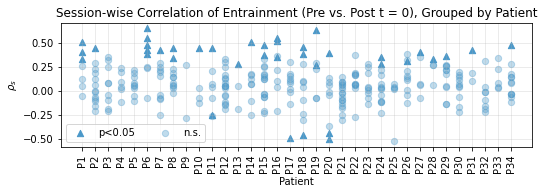

In [10]:
# Filter the DataFrame
filtered_df = df[
    (df['Radius'] == 100) &
    (df['Pre_Metric'] == 'Entrainment') &
    (df['Post_Metric'] == 'Entrainment')
]

# Preserve original order of appearance
ordered_patients = filtered_df['Patient'].drop_duplicates().tolist()
patient_to_x = {p: i for i, p in enumerate(ordered_patients)}
filtered_df['x'] = filtered_df['Patient'].map(patient_to_x)

# Define color and size
blue_color = plt.cm.Blues(0.6)
marker_size = 40

# Create figure
plt.figure(figsize=(7.5, 2.8))

plt.grid(True,alpha=0.3)

# Plot with fixed x-positions
lab_sign = {1: 'p<0.05', -1: 'p<0.05', 0: 'n.s.'}
plotted_labels = set()

for significance, marker, alpha in [
    (1, '^', 1.0),
    (-1, '^', 1.0),
    (0, 'o', 0.35)
]:
    subset = filtered_df[filtered_df['Significance'] == significance]
    label = lab_sign[significance]

    # Only add label if not already plotted
    if label not in plotted_labels:
        plt.scatter(
            subset['x'],
            subset['Correlation'],
            color=blue_color,
            marker=marker,
            alpha=alpha,
            s=marker_size,
            label=label
        )
        plotted_labels.add(label)
    else:
        # No label for duplicates
        plt.scatter(
            subset['x'],
            subset['Correlation'],
            color=blue_color,
            marker=marker,
            alpha=alpha,
            s=marker_size
        )

# Set x-ticks and labels manually
plt.xticks(ticks=range(len(ordered_patients)), labels=ordered_patients, rotation=90)
plt.title('Session-wise Correlation of Entrainment (Pre vs. Post t = 0), Grouped by Patient')
plt.ylabel(r'$\rho_s$')
plt.xlabel('Patient')
plt.tight_layout()
plt.legend(ncol=3,loc='lower left')
#plt.savefig(path_out+'EEG_Corr_Entrainment_xsubject.png', dpi=300, transparent=True)  # Transparent PNG
plt.show()
